## Calculating the hourly arrest rate

In [2]:
import pandas as pd

ri = pd.read_csv('RI-clean.csv', nrows=50000, low_memory=False)

ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

In [3]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.05182253697146428


In [5]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64


In [6]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

## Plotting the hourly arrest rate

In [7]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

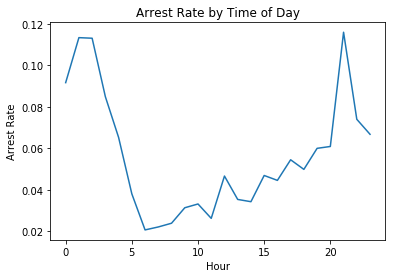

In [8]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

## Plotting drug-related stops

In [9]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [10]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

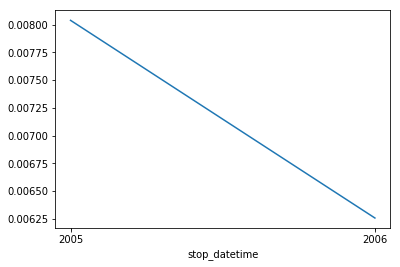

In [11]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

## Comparing drug and search rates

In [12]:
# Calculate and save the annual search rate
#annual_search_rate = ri.search_conducted.resample('A').mean()
annual_search_rate = ri.search_conducted.dropna().astype('int').resample('A').mean()

In [13]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

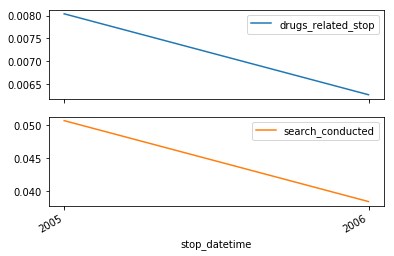

In [14]:
# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

## Tallying violations by district

In [15]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zone K1          276               517     69                   52      5895
Zone K2          422              1220    156                  256      7653
Zone K3         1083              1181    247                  435     10608
Zone X1           93               643     44                    9      1128
Zone X3          342               741    127                  102      4148
Zone X4          806              2220    249                  609      6679


In [16]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [17]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zone K1          276               517     69                   52      5895
Zone K2          422              1220    156                  256      7653
Zone K3         1083              1181    247                  435     10608


In [18]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

## Plotting violations by district

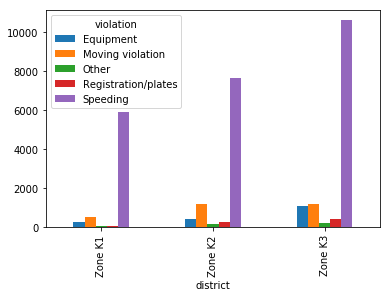

In [19]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

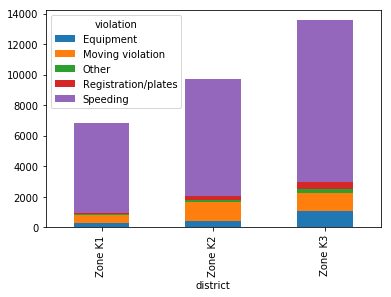

In [20]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

## Converting stop durations to numbers

In [21]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [22]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min':23, '30+ Min': 45}

In [23]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [27]:
# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

[ 8 23 45]


## Plotting stop length

In [28]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64


In [29]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

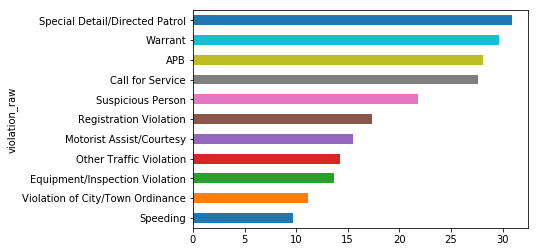

In [30]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()